In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("noise_build_times.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
qubit_list = data["qubits"]
single_qubit_extraction_times = data["single_qubit_extraction_time"]
two_qubit_extraction_time = data["two_qubit_extraction_time"]
measurement_extraction_time = data["measurement_extraction_time"]
single_qubit_error_postprocessing_time = data["single_qubit_error_postprocessing_time"]
two_qubit_error_postprocessing_time = data["two_qubit_error_postprocessing_time"]
two_qubit_error_operator_construction_time = data["two_qubit_error_operator_construction_time"]
connectivity_map_construction_time = data["connectivity_map_construction_time"]

In [6]:
name_list = {
    "Single Qubit Extraction": single_qubit_extraction_times,
    "Two Qubit Extraction": two_qubit_extraction_time,
    "Measurement Extraction": measurement_extraction_time,
    "Single Qubit Error Postprocessing": single_qubit_error_postprocessing_time,
    "Two Qubit Error Postprocessing": two_qubit_error_postprocessing_time,
    "Two Qubit Error Operator Construction": two_qubit_error_operator_construction_time,
    "Connectivity Map Construction": connectivity_map_construction_time
}

In [9]:
name_list["Single Qubit Extraction"][0]

[np.float64(4967162.2),
 np.float64(3162206.4),
 np.float64(3196642.4),
 np.float64(3229339.4),
 np.float64(3176469.2),
 np.float64(3281003.0),
 np.float64(3685676.8),
 np.float64(4273390.0)]

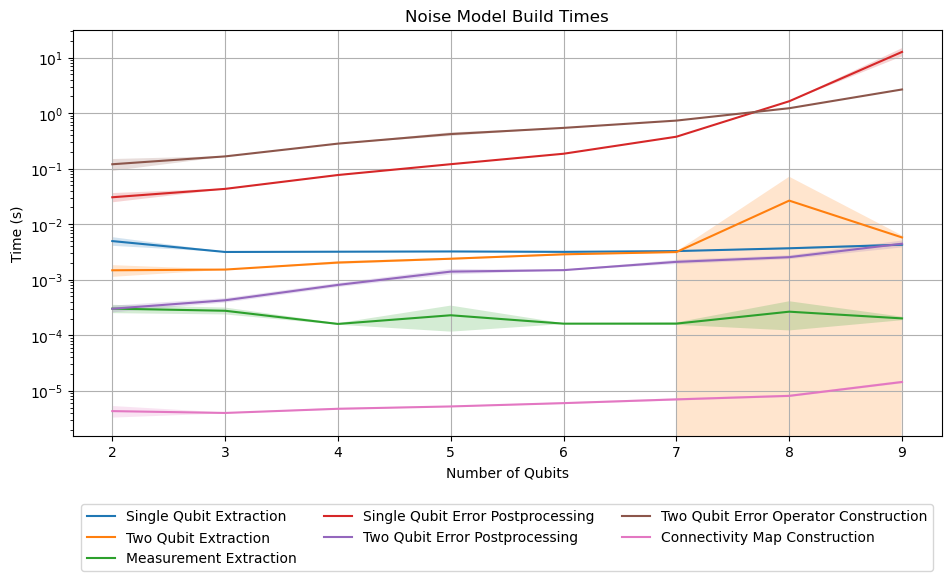

In [11]:
plt.figure(figsize=(10, 6))
for key in name_list.keys():
    plt.semilogy(qubit_list, np.array(name_list[key][0])/1e9, label=key)
    plt.fill_between(qubit_list,
                     (np.array(name_list[key][0]) - np.array(name_list[key][1]))/1e9,
                     (np.array(name_list[key][0]) + np.array(name_list[key][1]))/1e9,
                     alpha=0.2)
plt.xlabel("Number of Qubits")
plt.ylabel("Time (s)")
plt.title("Noise Model Build Times")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()